In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv("flipkart_sales.csv")

In [81]:
df

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1
...,...,...,...,...,...,...,...,...,...
995,ORD00996,Smartphone,Electronics,28995.81,3,86987.43,2025-01-13,COD,5.0
996,ORD00997,Perfume,Beauty,32799.51,2,65599.02,2024-12-18,Wallet,2.4
997,ORD00998,Face Cream,Beauty,40840.80,1,40840.80,2024-07-26,UPI,3.1
998,ORD00999,Cookware Set,Home & Kitchen,34741.79,4,138967.16,2024-10-02,Net Banking,3.2


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           1000 non-null   object 
 1   Product Name       1000 non-null   object 
 2   Category           1000 non-null   object 
 3   Price (INR)        1000 non-null   float64
 4   Quantity Sold      1000 non-null   int64  
 5   Total Sales (INR)  1000 non-null   float64
 6   Order Date         1000 non-null   object 
 7   Payment Method     1000 non-null   object 
 8   Customer Rating    1000 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


In [87]:
df.describe()

,Price (INR),Quantity Sold,Total Sales (INR),Customer Rating
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,24520.258260,3.097000,75213.112740,3.011100
std,14187.611227,1.410525,59457.598352,1.145408
min,139.850000,1.000000,419.550000,1.000000
25%,12378.905000,2.000000,28581.765000,2.000000
50%,24650.015000,3.000000,57358.300000,3.100000
75%,35981.925000,4.000000,110618.595000,4.000000
max,49911.750000,5.000000,243903.900000,5.000000


In [89]:
missing_values = df.isnull().sum()

In [91]:
df["Product Name"].fillna("Unknown", inplace=True)  # Replace missing product names with "Unknown"
df["Category"].fillna("Miscellaneous", inplace=True)  # Replace missing categories
df["Price (INR)"].fillna(df["Price (INR)"].median(), inplace=True)  # Replace missing prices with median
df["Quantity Sold"].fillna(df["Quantity Sold"].median(), inplace=True)  # Replace missing quantity with median
df["Total Sales (INR)"] = df["Price (INR)"] * df["Quantity Sold"]  # Recalculate total sales if missing
df["Order Date"].fillna(df["Order Date"].mode()[0], inplace=True)  # Fill missing dates with the most common date
df["Payment Method"].fillna("Unknown", inplace=True)  # Replace missing payment methods with "Unknown"
df["Customer Rating"].fillna(df["Customer Rating"].median(), inplace=True)  # Replace missing ratings with median

In [93]:
df["Order Date"] = pd.to_datetime(df["Order Date"])  # Ensure 'Order Date' is in datetime format
df["Customer Rating"] = df["Customer Rating"].astype(float)  # Ensure ratings are floats


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           1000 non-null   object        
 1   Product Name       1000 non-null   object        
 2   Category           1000 non-null   object        
 3   Price (INR)        1000 non-null   float64       
 4   Quantity Sold      1000 non-null   int64         
 5   Total Sales (INR)  1000 non-null   float64       
 6   Order Date         1000 non-null   datetime64[ns]
 7   Payment Method     1000 non-null   object        
 8   Customer Rating    1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 70.4+ KB


In [97]:
df.isnull().sum()

Order ID             0
Product Name         0
Category             0
Price (INR)          0
Quantity Sold        0
Total Sales (INR)    0
Order Date           0
Payment Method       0
Customer Rating      0
dtype: int64

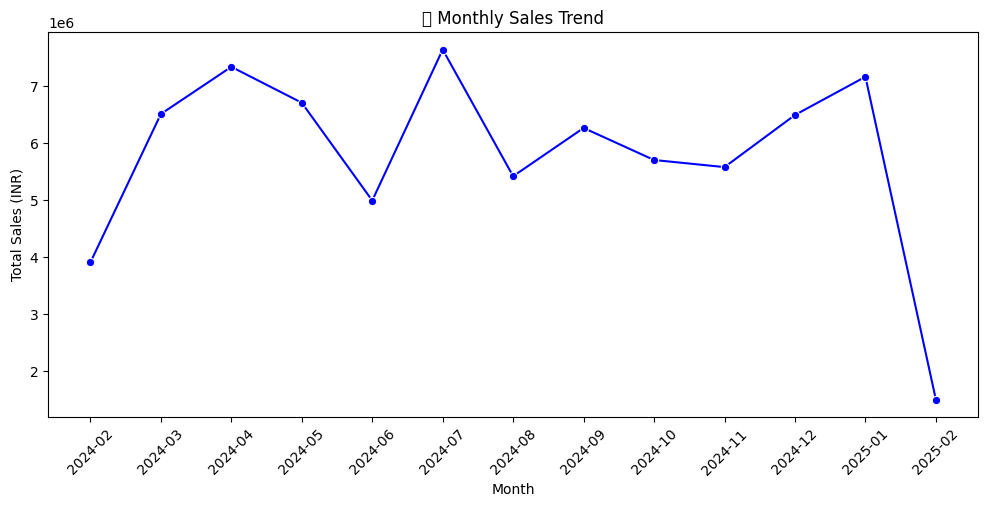

In [101]:
df["Month"] = df["Order Date"].dt.to_period("M")
monthly_sales = df.groupby("Month")["Total Sales (INR)"].sum()

plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker="o", color="b")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Sales (INR)")
plt.title("📈 Monthly Sales Trend")
plt.show()

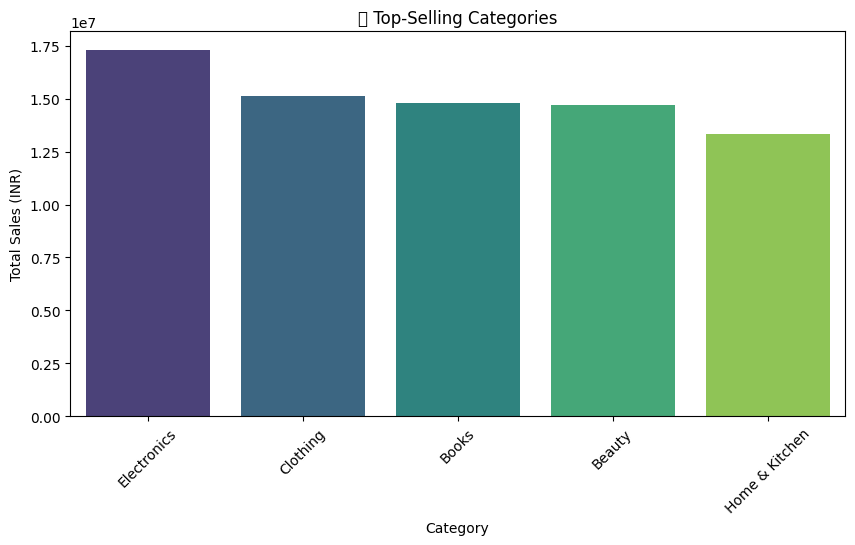

In [103]:
category_sales = df.groupby("Category")["Total Sales (INR)"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Total Sales (INR)")
plt.title("🏆 Top-Selling Categories")
plt.show()

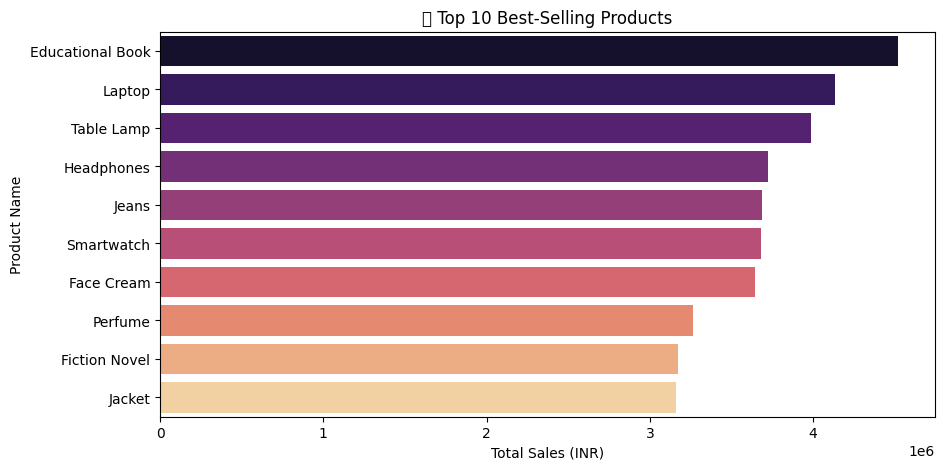

In [105]:
top_products = df.groupby("Product Name")["Total Sales (INR)"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="magma")
plt.xlabel("Total Sales (INR)")
plt.ylabel("Product Name")
plt.title("🔥 Top 10 Best-Selling Products")
plt.show()

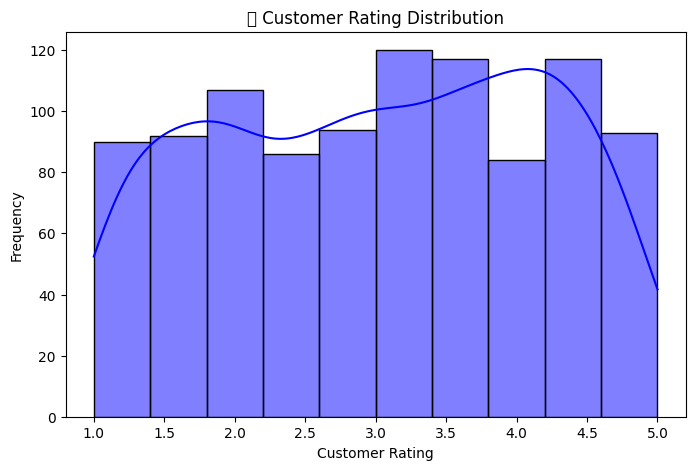

In [107]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Customer Rating"], bins=10, kde=True, color="blue")
plt.xlabel("Customer Rating")
plt.ylabel("Frequency")
plt.title("⭐ Customer Rating Distribution")
plt.show()

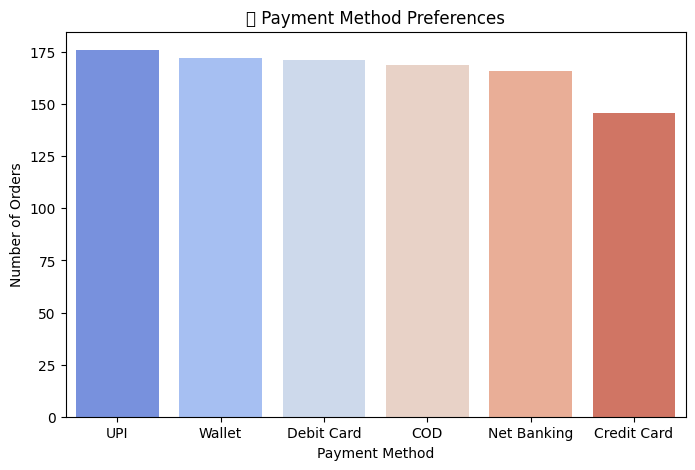

In [109]:
payment_counts = df["Payment Method"].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="coolwarm")
plt.xlabel("Payment Method")
plt.ylabel("Number of Orders")
plt.title("💳 Payment Method Preferences")
plt.show()

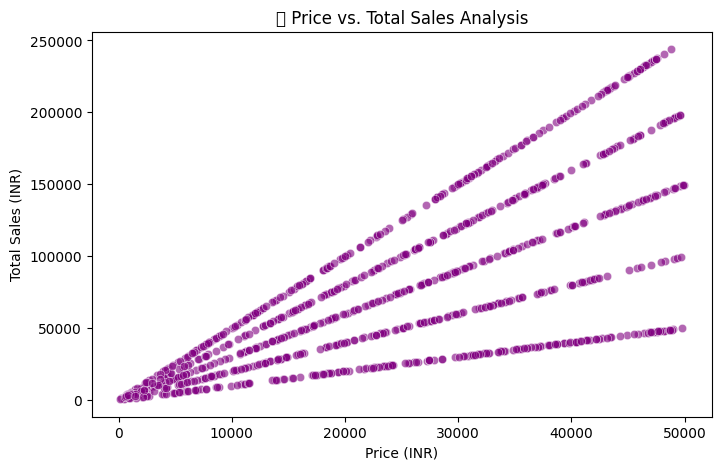

In [111]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Price (INR)"], y=df["Total Sales (INR)"], alpha=0.6, color="purple")
plt.xlabel("Price (INR)")
plt.ylabel("Total Sales (INR)")
plt.title("💰 Price vs. Total Sales Analysis")
plt.show()

In [115]:
df.to_csv("flipkart_sales.csv", index=False)